In [1]:
# Librairies
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt

path ="/home/gleprince/Documents/Certificat/Projet_2/starting_kit/sample_data"
data = pd.read_csv(path+"/store_train.data",sep=" ",names = ['ID', 'day', 'date', 'nb_customer','open','promo','state','school'])

In [2]:
data.head()

,ID,day,date,nb_customer,open,promo,state,school
0,874,4,2014-12-18,653,1,1,0,0
1,244,1,2013-08-19,448,1,0,0,1
2,222,2,2014-06-10,627,1,0,0,0
3,655,5,2013-04-05,545,1,0,0,1
4,806,4,2013-12-19,729,1,1,0,0


In [3]:
data.dtypes

ID              int64
day             int64
date           object
nb_customer     int64
open            int64
promo           int64
state          object
school          int64
dtype: object

In [30]:
data["date"]=pd.Categorical(data["date"],ordered=False)
data["state"]=pd.Categorical(data["state"],ordered=False)

In [54]:
data_extract=pd.get_dummies(data[["state"]])
rest=data[["ID","day","date","nb_customer","open","promo","school"]]
ddata=pd.concat([data_extract,rest],axis=1)
ddata.head()

,state_0,state_a,state_b,state_c,ID,day,date,nb_customer,open,promo,school
0,1,0,0,0,874,4,2014-12-18,653,1,1,0
1,1,0,0,0,244,1,2013-08-19,448,1,0,1
2,1,0,0,0,222,2,2014-06-10,627,1,0,0
3,1,0,0,0,655,5,2013-04-05,545,1,0,1
4,1,0,0,0,806,4,2013-12-19,729,1,1,0


In [55]:
ddata["state_0"]=pd.DataFrame(ddata["state_0"], dtype=int)
ddata["state_a"]=pd.DataFrame(ddata["state_a"], dtype=int)
ddata["state_b"]=pd.DataFrame(ddata["state_b"], dtype=int)
ddata["state_c"]=pd.DataFrame(ddata["state_c"], dtype=int)
ddata.dtypes
        

state_0         int64
state_a         int64
state_b         int64
state_c         int64
ID              int64
day             int64
date           object
nb_customer     int64
open            int64
promo           int64
school          int64
dtype: object

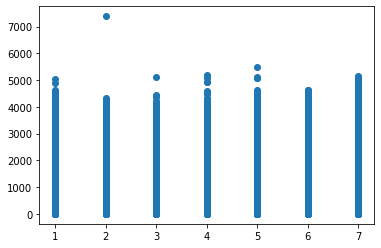

In [64]:
plt.scatter(data["day"],data["nb_customer"])
plt.show()

# ACP

In [65]:
# ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(ddata[["nb_customer","day","open","state_0","state_a","state_b","state_c","school","promo"]])

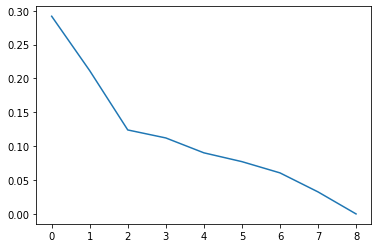

In [78]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [79]:
print(pca.explained_variance_ratio_)

[2.91851830e-01 2.11476376e-01 1.23972456e-01 1.12168200e-01
 9.02125196e-02 7.71901284e-02 6.06005508e-02 3.25279391e-02
 1.06889385e-29]


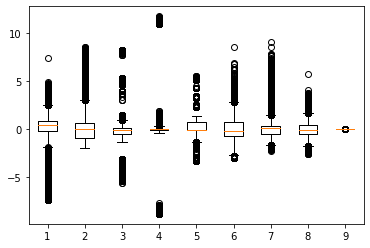

In [80]:
## distribution des composantes principales
plt.boxplot(C[:,0:20])
plt.show()

In [81]:
ex_variance=np.var(C,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio) 


[2.91851830e-01 2.11476376e-01 1.23972456e-01 1.12168200e-01
 9.02125196e-02 7.71901284e-02 6.06005508e-02 3.25279391e-02
 1.11115165e-29]


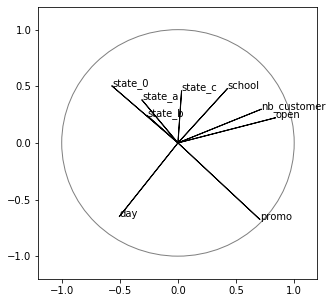

In [77]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, ddata[["nb_customer","day","open","promo","state_0","state_a","state_b","state_c","school"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

# APPRENTISSAGE


In [83]:
# Variables explicatives
data_extract=pd.get_dummies(data[["state"]])
rest=data[["ID","day","date","open","promo","school"]]
data_test=pd.concat([data_extract,rest],axis=1)
data_test.head()

,state_0,state_a,state_b,state_c,ID,day,date,open,promo,school
0,1,0,0,0,874,4,2014-12-18,1,1,0
1,1,0,0,0,244,1,2013-08-19,1,0,1
2,1,0,0,0,222,2,2014-06-10,1,0,0
3,1,0,0,0,655,5,2013-04-05,1,0,1
4,1,0,0,0,806,4,2013-12-19,1,1,0


In [85]:
# variable à expliquer réelle
Yr=data["nb_customer"]

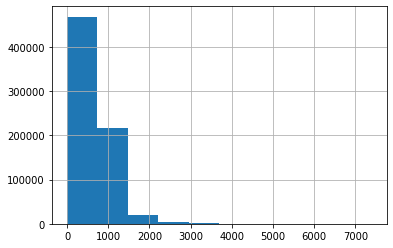

In [86]:
Yr.hist()
plt.show()